<a href="https://colab.research.google.com/github/Motupallysundaracharya38/OBJECTDETECTION/blob/master/objectdetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# to select the version of tensor flow
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
# Some models to train on
MODELS_CONFIG = {
    'ssd_mobilenet_v2': {
        'model_name': 'ssd_mobilenet_v2_coco_2018_03_29', # Layers input and output shape how many neurons in each layer(Model building)
        'pipeline_file': 'ssd_mobilenet_v2_coco.config', # While compiling and fitting the model some parameters should be tuned (Defining the arguments values)
    },
    'faster_rcnn_inception_v2': {
        'model_name': 'faster_rcnn_inception_v2_coco_2018_01_28',
        'pipeline_file': 'faster_rcnn_inception_v2_pets.config',
    },
    'rfcn_resnet101': {
        'model_name': 'rfcn_resnet101_coco_2018_01_28',
        'pipeline_file': 'rfcn_resnet101_pets.config',
    }
}

# Select a model in `MODELS_CONFIG`.
# I chose ssd_mobilenet_v2 for this project, you could choose any
selected_model = 'ssd_mobilenet_v2'

In [3]:
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk

!pip install -qq Cython contextlib2 pillow lxml matplotlib

!pip install -qq pycocotools

E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/main/p/pillow/python-pil_5.1.0-1ubuntu0.2_amd64.deb  404  Not Found [IP: 91.189.88.142 80]
E: Unable to fetch some archives, maybe run apt-get update or try with --fix-missing?


In [4]:
from __future__ import division, print_function, absolute_import

import pandas as pd
import numpy as np
import csv
import re
import cv2 
import os
import glob
import xml.etree.ElementTree as ET

import io
import tensorflow.compat.v1 as tf

from PIL import Image
from collections import namedtuple, OrderedDict

import shutil
import urllib.request
import tarfile

from google.colab import files

In [5]:
#we need tenorflow v 1.15.0, object detection API is removed from tf v 2.0+
#!pip install tensorflow==1.15.0

print(tf.__version__)

1.15.2


In [6]:
#creates a directory for the whole project
!mkdir aeroplane_detection

In [7]:
# list information about files and directories within the file system.
!ls -l

total 12
drwxr-xr-x 2 root root 4096 Jul 25 06:21 aeroplane_detection
drwx------ 4 root root 4096 Jul 25 06:19 drive
drwxr-xr-x 1 root root 4096 Jul 10 16:29 sample_data


In [8]:
# changing  the current directory
%cd /content/aeroplane_detection

/content/aeroplane_detection


In [9]:
# creating a directory to store the training and testing data
!mkdir data

# folders for the training and testing data.
!mkdir data/images data/train_labels data/test_labels

In [10]:
# list information about files and directories within the file system.
!ls

data


In [11]:
# present working directly
!pwd

/content/aeroplane_detection


In [12]:
# importing the os to check the files in the directory 
import os
os.listdir('data')

['train_labels', 'images', 'test_labels']

In [13]:
# extracting the the images zip files from the drive and storing it in the tmp folder
import os
import zipfile
local_zip = "/content/drive/My Drive/Images.zip" ## which zip file you want to extarct
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp') ## In which location you want to store extracted files
zip_ref.close()

In [14]:
# extracting the the Airplanes_Annotations zip files from the drive and storing it in the tmp folder
import os
import zipfile
local_zip = "/content/drive/My Drive/Airplane_Annotation.zip" ## which zip file you want to extarct
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp') ## In which location you want to store extracted files
zip_ref.close()

In [15]:
# checking the images folder whether present or not
os.listdir("/tmp/Images")

['airplane_371.jpg',
 'airplane_357.jpg',
 'airplane_116.jpg',
 'airplane_507.jpg',
 'airplane_034.jpg',
 'airplane_675.jpg',
 'airplane_483.jpg',
 'airplane_642.jpg',
 'airplane_031.jpg',
 'airplane_324.jpg',
 'airplane_303.jpg',
 'airplane_370.jpg',
 'airplane_647.jpg',
 'airplane_032.jpg',
 'airplane_133.jpg',
 'airplane_232.jpg',
 'airplane_564.jpg',
 'airplane_185.jpg',
 'Planes12.jpg',
 'airplane_058.jpg',
 'airplane_108.jpg',
 'airplane_510.jpg',
 'airplane_354.jpg',
 'airplane_674.jpg',
 'airplane_187.jpg',
 'Planes6.jpg',
 'airplane_288.jpg',
 'airplane_410.jpg',
 'airplane_162.jpg',
 'airplane_122.jpg',
 'airplane_514.jpg',
 'airplane_171.jpg',
 'airplane_629.jpg',
 'airplane_035.jpg',
 'airplane_579.jpg',
 'airplane_687.jpg',
 'airplane_545.jpg',
 'airplane_033.jpg',
 'airplane_553.jpg',
 'airplane_574.jpg',
 'airplane_019.jpg',
 'airplane_125.jpg',
 'airplane_252.jpg',
 'airplane_513.jpg',
 'airplane_316.jpg',
 'airplane_161.jpg',
 'airplane_677.jpg',
 'airplane_087.jpg',
 

In [16]:
# checking the airplanes_annotations file present or not
os.listdir("/tmp/Airplanes_Annotations")

['airplane_132.csv',
 'airplane_028.csv',
 'airplane_174.csv',
 'airplane_280.csv',
 'airplane_098.csv',
 'airplane_291.csv',
 'airplane_250.csv',
 'airplane_450.csv',
 'airplane_641.csv',
 '428461.csv',
 'airplane_601.csv',
 'airplane_417.csv',
 'airplane_511.csv',
 'airplane_088.csv',
 'airplane_540.csv',
 'airplane_552.csv',
 'airplane_478.csv',
 'airplane_684.csv',
 'airplane_273.csv',
 'airplane_102.csv',
 'airplane_089.csv',
 'airplane_239.csv',
 'airplane_582.csv',
 'airplane_126.csv',
 'airplane_001.csv',
 'airplane_373.csv',
 'airplane_683.csv',
 'airplane_302.csv',
 'airplane_288.csv',
 'airplane_482.csv',
 'airplane_283.csv',
 'airplane_092.csv',
 'airplane_496.csv',
 'airplane_049.csv',
 'airplane_051.csv',
 'airplane_418.csv',
 'airplane_370.csv',
 'airplane_043.csv',
 'airplane_257.csv',
 'airplane_155.csv',
 'airplane_412.csv',
 'airplane_016.csv',
 'airplane_106.csv',
 'airplane_261.csv',
 'airplane_650.csv',
 'airplane_462.csv',
 'airplane_356.csv',
 'airplane_036.csv'

In [17]:
!pwd

/content/aeroplane_detection


In [18]:
# moving the img files from tmp and to the data/images
!mv /tmp/Images/* data/images

In [19]:
# moving the annotaion from tmp and to data/train labels
!mv /tmp/Airplanes_Annotations/* data/train_labels

In [20]:
# lists the files inside 'annotations' in a random order (not really random, by their hash value instead)
# Moves the first 200 labels to the testing dir: `test_labels`
!ls data/train_labels/* | sort -R | head -200 | xargs -I{} mv {} data/test_labels

In [21]:
# to divide into train labels into 529
!ls data/train_labels/ | wc -l

529


In [22]:

# to divide into the test labesl
!ls  data/test_labels/ | wc -l

200


In [23]:
!pwd

/content/aeroplane_detection


In [24]:
cd data


/content/aeroplane_detection/data


In [25]:
!pwd

/content/aeroplane_detection/data


In [26]:
cd train_labels

/content/aeroplane_detection/data/train_labels


In [27]:
train=[]
import os
for f in os.listdir():
  file1=open(f,'r')
  for line in file1.readlines():
    line=line.strip('\n')
    l=[str(f.split('.')[0])+".jpg"]
    l=l+line.split(' ')
    l.append('aeroplane')
    train.append(l)

print(len(train))

1965


In [28]:
cd -


/content/aeroplane_detection/data


In [29]:
cd test_labels

/content/aeroplane_detection/data/test_labels


In [30]:
!pwd

/content/aeroplane_detection/data/test_labels


In [31]:
test=[]
import os
for f in os.listdir():
  file1=open(f,'r')
  for line in file1.readlines():
    line=line.strip('\n')
    l=[str(f.split('.')[0])+".jpg"]
    l=l+line.split(' ')
    l.append('aeroplane')
    test.append(l)
print(len(test))

942


In [32]:
import pandas as pd
train=pd.DataFrame(train,columns=['filename','xmin','ymin','xmax','ymax','class'])

In [33]:
test=pd.DataFrame(test,columns=['filename','xmin','ymin','xmax','ymax','class'])

In [34]:
test

,filename,xmin,ymin,xmax,ymax,class
0,428461.jpg,176,12,207,41,aeroplane
1,428461.jpg,155,47,188,82,aeroplane
2,428461.jpg,86,125,118,160,aeroplane
3,428461.jpg,54,108,83,134,aeroplane
4,428461.jpg,0,65,22,104,aeroplane
...,...,...,...,...,...,...
937,airplane_381.jpg,46,79,135,141,aeroplane
938,airplane_381.jpg,178,30,254,107,aeroplane
939,airplane_621.jpg,93,33,173,93,aeroplane
940,airplane_621.jpg,40,94,132,161,aeroplane


In [35]:
train

,filename,xmin,ymin,xmax,ymax,class
0,airplane_132.jpg,59,163,99,205,aeroplane
1,airplane_132.jpg,100,78,117,97,aeroplane
2,airplane_132.jpg,115,61,133,81,aeroplane
3,airplane_132.jpg,223,104,256,157,aeroplane
4,airplane_132.jpg,219,3,255,19,aeroplane
...,...,...,...,...,...,...
1960,airplane_695.jpg,8,11,249,255,aeroplane
1961,airplane_535.jpg,167,138,221,191,aeroplane
1962,airplane_597.jpg,2,204,43,249,aeroplane
1963,airplane_597.jpg,163,105,212,144,aeroplane


In [36]:
train.isnull().sum()

filename    0
xmin        0
ymin        0
xmax        1
ymax        1
class       1
dtype: int64

In [37]:
train.isnull().sum()

filename    0
xmin        0
ymin        0
xmax        1
ymax        1
class       1
dtype: int64

In [39]:
train[train['ymin']=='aeroplane']

,filename,xmin,ymin,xmax,ymax,class
1282,airplane_112.jpg,8,aeroplane,None,None,None


In [40]:
train.drop([1282],axis=0,inplace=True)


In [41]:
test[test['ymin']=='aeroplane']

,filename,xmin,ymin,xmax,ymax,class
402,airplane_287.jpg,2,aeroplane,None,None,None


In [42]:
test.drop([402],axis=0,inplace=True)


In [43]:
train[train['ymin']=='aeroplane']

,filename,xmin,ymin,xmax,ymax,class


In [44]:
test[test['ymin']=='aeroplane']

,filename,xmin,ymin,xmax,ymax,class


In [45]:
train.to_csv('/content/aeroplane_detection/data/train_labels.csv',index=False)


In [46]:
test.to_csv('/content/aeroplane_detection/data/test_labels.csv',index=False)


In [47]:
!pwd

/content/aeroplane_detection/data/test_labels


In [48]:
train_df=pd.read_csv('/content/aeroplane_detection/data/train_labels.csv')
train_df

,filename,xmin,ymin,xmax,ymax,class
0,airplane_132.jpg,59,163,99,205,aeroplane
1,airplane_132.jpg,100,78,117,97,aeroplane
2,airplane_132.jpg,115,61,133,81,aeroplane
3,airplane_132.jpg,223,104,256,157,aeroplane
4,airplane_132.jpg,219,3,255,19,aeroplane
...,...,...,...,...,...,...
1959,airplane_695.jpg,8,11,249,255,aeroplane
1960,airplane_535.jpg,167,138,221,191,aeroplane
1961,airplane_597.jpg,2,204,43,249,aeroplane
1962,airplane_597.jpg,163,105,212,144,aeroplane


In [49]:
test_df=pd.read_csv('/content/aeroplane_detection/data/test_labels.csv')
test_df.head()

,filename,xmin,ymin,xmax,ymax,class
0,428461.jpg,176,12,207,41,aeroplane
1,428461.jpg,155,47,188,82,aeroplane
2,428461.jpg,86,125,118,160,aeroplane
3,428461.jpg,54,108,83,134,aeroplane
4,428461.jpg,0,65,22,104,aeroplane


In [50]:
!pwd

/content/aeroplane_detection/data/test_labels


In [51]:
cd -

/content/aeroplane_detection/data


In [53]:
%cd /content/aeroplane_detection/data
label_map_path = os.path.join("label_map.pbtxt")
classes=['aeroplane']
pbtxt_content = ""
print(type(classes))
#creats a pbtxt file the has the class names.
for i, class_name in enumerate(classes):
    # display_name is optional.
    pbtxt_content = (
        pbtxt_content
        + "item {{\n    id: {0}\n    name: '{1}'\n    display_name: 'aeroplane'\n }}\n\n".format(i + 1, class_name)
    )
pbtxt_content = pbtxt_content.strip()
with open(label_map_path, "w") as f:
    f.write(pbtxt_content)

/content/aeroplane_detection/data
<class 'list'>


In [54]:
#checking the pbtxt file
!cat label_map.pbtxt

item {
    id: 1
    name: 'aeroplane'
    display_name: 'aeroplane'
 }

In [55]:
!ls -l

total 200
drwxr-xr-x 2 root root 32768 Jul 25 06:23 images
-rw-r--r-- 1 root root    71 Jul 25 06:27 label_map.pbtxt
drwxr-xr-x 2 root root 12288 Jul 25 06:23 test_labels
-rw-r--r-- 1 root root 37671 Jul 25 06:26 test_labels.csv
drwxr-xr-x 2 root root 32768 Jul 25 06:23 train_labels
-rw-r--r-- 1 root root 79564 Jul 25 06:26 train_labels.csv


In [56]:
!pwd


/content/aeroplane_detection/data


In [57]:

# https://colab.research.google.com/drive/166QSWpRQVr7Da1afFeBlmyhDHkoDi5BR?authuser=2


In [58]:
%cd /content/aeroplane_detection/data
train.to_csv('train_labels.csv', encoding='utf-8', index=False)
test.to_csv('test_labels.csv', encoding='utf-8', index=False)

/content/aeroplane_detection/data


In [59]:
!ls -l

total 200
drwxr-xr-x 2 root root 32768 Jul 25 06:23 images
-rw-r--r-- 1 root root    71 Jul 25 06:27 label_map.pbtxt
drwxr-xr-x 2 root root 12288 Jul 25 06:23 test_labels
-rw-r--r-- 1 root root 37671 Jul 25 06:28 test_labels.csv
drwxr-xr-x 2 root root 32768 Jul 25 06:23 train_labels
-rw-r--r-- 1 root root 79564 Jul 25 06:28 train_labels.csv


In [60]:
# Downlaods Tenorflow
%cd /content/aeroplane_detection/
!git clone --q https://github.com/tensorflow/models.git

/content/aeroplane_detection


In [61]:
!pwd

/content/aeroplane_detection


In [62]:
!mv models/official models/research/official

In [63]:
%cd /content/aeroplane_detection/models/research
#compiling the proto buffers (not important to understand for this project but you can learn more about them here: https://developers.google.com/protocol-buffers/)
!protoc object_detection/protos/*.proto --python_out=.

# exports the PYTHONPATH environment variable with the reasearch and slim folders' paths
os.environ['PYTHONPATH'] += ':/content/aeroplane_detection/models/research/:/content/aeroplane_detection/models/research/slim/'

/content/aeroplane_detection/models/research
object_detection/protos/input_reader.proto: warning: Import object_detection/protos/image_resizer.proto but not used.


In [64]:
# testing the model builder
!pip install tf_slim

!python3 object_detection/builders/model_builder_test.py

     |████████████████████████████████| 358kB 3.5MB/s 


In [65]:
test[test['ymin']=='aeroplane']

,filename,xmin,ymin,xmax,ymax,class


In [66]:
train[train['ymin']=='aeroplane']

,filename,xmin,ymin,xmax,ymax,class


In [67]:
#adjusted from: https://github.com/datitran/raccoon_dataset

# converts the csv files for training and testing data to two TFRecords files.
# places the output in the same directory as the input


from object_detection.utils import dataset_util
%cd /content/aeroplane_detection/models/

DATA_BASE_PATH = '/content/aeroplane_detection/data/'
image_dir = DATA_BASE_PATH +'images/'

def class_text_to_int(row_label):
		if row_label == 'aeroplane':
				return 1
		else:
				None


def split(df, group):
		data = namedtuple('data', ['filename', 'object'])
		gb = df.groupby(group)
		return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]

def create_tf_example(group, path):
		with tf.io.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
				encoded_jpg = fid.read()
		encoded_jpg_io = io.BytesIO(encoded_jpg)
		image = Image.open(encoded_jpg_io)
		width, height = image.size

		filename = group.filename.encode('utf8')
		image_format = b'jpg'
		xmins = []
		xmaxs = []
		ymins = []
		ymaxs = []
		classes_text = []
		classes = []

		for index, row in group.object.iterrows():
				xmins.append(row['xmin'] / width)
				xmaxs.append(row['xmax'] / width)
				ymins.append(row['ymin'] / height)
				ymaxs.append(row['ymax'] / height)
				classes_text.append(row['class'].encode('utf8'))
				classes.append(class_text_to_int(row['class']))

		tf_example = tf.train.Example(features=tf.train.Features(feature={
				'image/height': dataset_util.int64_feature(height),
				'image/width': dataset_util.int64_feature(width),
				'image/filename': dataset_util.bytes_feature(filename),
				'image/source_id': dataset_util.bytes_feature(filename),
				'image/encoded': dataset_util.bytes_feature(encoded_jpg),
				'image/format': dataset_util.bytes_feature(image_format),
				'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
				'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
				'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
				'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
				'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
				'image/object/class/label': dataset_util.int64_list_feature(classes),
		}))
		return tf_example

for csv in ['train_labels', 'test_labels']:
  writer = tf.io.TFRecordWriter(DATA_BASE_PATH + csv + '.record')
  path = os.path.join(image_dir)
  examples = pd.read_csv(DATA_BASE_PATH + csv + '.csv')
  grouped = split(examples, 'filename')
  for group in grouped:
      tf_example = create_tf_example(group, path)
      writer.write(tf_example.SerializeToString())
    
  writer.close()
  output_path = os.path.join(os.getcwd(), DATA_BASE_PATH + csv + '.record')
  print('Successfully created the TFRecords: {}'.format(DATA_BASE_PATH +csv + '.record'))


/content/aeroplane_detection/models
Successfully created the TFRecords: /content/aeroplane_detection/data/train_labels.record
Successfully created the TFRecords: /content/aeroplane_detection/data/test_labels.record


/content/aeroplane_detection/data
airplane_132.jpg 78 117 97


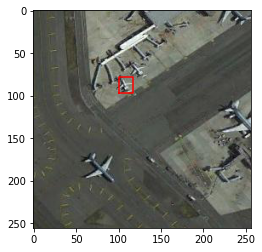

In [69]:
%cd /content/aeroplane_detection/data
from PIL import Image

os.listdir('images')
#image = Image.open("images/4f30dc4b8e2a583d.jpg")
#height,width=image.size
#print(height,width)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
for row in train.values[1:]:
  img = plt.imread("images/"+row[0])
  plt.imshow(img)
  print(row[0],row[2],row[3],row[4])
  plt.plot([float(row[1]),float(row[3]),float(row[3]),float(row[1]),float(row[1])],[float(row[4]),float(row[4]),float(row[2]),float(row[2]),float(row[4])],color='r')
  break

In [70]:
examples

,filename,xmin,ymin,xmax,ymax,class
0,428461.jpg,176,12,207,41,aeroplane
1,428461.jpg,155,47,188,82,aeroplane
2,428461.jpg,86,125,118,160,aeroplane
3,428461.jpg,54,108,83,134,aeroplane
4,428461.jpg,0,65,22,104,aeroplane
...,...,...,...,...,...,...
936,airplane_381.jpg,46,79,135,141,aeroplane
937,airplane_381.jpg,178,30,254,107,aeroplane
938,airplane_621.jpg,93,33,173,93,aeroplane
939,airplane_621.jpg,40,94,132,161,aeroplane


In [71]:
# TFRecords are created
!ls -lX /content/aeroplane_detection/data/

total 9324
drwxr-xr-x 2 root root   32768 Jul 25 06:23 images
drwxr-xr-x 2 root root   12288 Jul 25 06:23 test_labels
drwxr-xr-x 2 root root   32768 Jul 25 06:23 train_labels
-rw-r--r-- 1 root root   37671 Jul 25 06:28 test_labels.csv
-rw-r--r-- 1 root root   79564 Jul 25 06:28 train_labels.csv
-rw-r--r-- 1 root root      71 Jul 25 06:27 label_map.pbtxt
-rw-r--r-- 1 root root 2563245 Jul 25 06:30 test_labels.record
-rw-r--r-- 1 root root 6775190 Jul 25 06:30 train_labels.record


In [72]:
# downloading the base model
%cd /content/aeroplane_detection/models/research

# Name of the object detection model to use.
MODEL = MODELS_CONFIG[selected_model]['model_name']

# Name of the pipline file in tensorflow object detection API.
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']

#selecting the model
MODEL_FILE = MODEL + '.tar.gz'

#creating the downlaod link for the model selected
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

#the distination folder where the model will be saved
fine_tune_dir = '/content/aeroplane_detection/models/research/pretrained_model'

#checks if the model has already been downloaded
if not (os.path.exists(MODEL_FILE)):
    urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

#unzipping the file and extracting its content
tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

# creating an output file to save the model while training
os.remove(MODEL_FILE)
if (os.path.exists(fine_tune_dir)):
    shutil.rmtree(fine_tune_dir)
os.rename(MODEL, fine_tune_dir)


/content/aeroplane_detection/models/research


In [73]:
#checking the content of the pretrained model.
# this is the directory of the "fine_tune_checkpoint" that is used in the config file.
!echo {fine_tune_dir}
!ls -alh {fine_tune_dir}

/content/aeroplane_detection/models/research/pretrained_model
total 135M
drwxr-xr-x  3 345018 89939 4.0K Mar 30  2018 .
drwxr-xr-x 64 root   root  4.0K Jul 25 06:32 ..
-rw-r--r--  1 345018 89939   77 Mar 30  2018 checkpoint
-rw-r--r--  1 345018 89939  67M Mar 30  2018 frozen_inference_graph.pb
-rw-r--r--  1 345018 89939  65M Mar 30  2018 model.ckpt.data-00000-of-00001
-rw-r--r--  1 345018 89939  15K Mar 30  2018 model.ckpt.index
-rw-r--r--  1 345018 89939 3.4M Mar 30  2018 model.ckpt.meta
-rw-r--r--  1 345018 89939 4.2K Mar 30  2018 pipeline.config
drwxr-xr-x  3 345018 89939 4.0K Mar 30  2018 saved_model


In [74]:
# configering the training the pipe line
#the path to the folder containing all the sample config files
CONFIG_BASE = "/content/aeroplane_detection/models/research/object_detection/samples/configs/"

#path to the specified model's config file
model_pipline = os.path.join(CONFIG_BASE, pipeline_file)
model_pipline

'/content/aeroplane_detection/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config'

In [75]:
#editing the configuration file to add the path for the TFRecords files, pbtxt,batch_size,num_steps,num_classes.
# any image augmentation, hyperparemeter tunning (drop out, batch normalization... etc) would be editted here

%%writefile {model_pipline}
model {
  ssd {
    num_classes: 1 # number of classes to be detected
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    anchor_generator {
      ssd_anchor_generator {
        num_layers: 6
        min_scale: 0.2
        max_scale: 0.95
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        aspect_ratios: 0.5
        aspect_ratios: 3.0
        aspect_ratios: 0.3333
      }
    }
    # all images will be resized to the below W x H.
    image_resizer { 
      fixed_shape_resizer {
        height: 300
        width: 300
      }
    }
    box_predictor {
      convolutional_box_predictor {
        min_depth: 0
        max_depth: 0
        num_layers_before_predictor: 0
        #use_dropout: false
        use_dropout: true # to counter over fitting. you can also try tweaking its probability below
        dropout_keep_probability: 0.8
        kernel_size: 1
        box_code_size: 4
        apply_sigmoid_to_scores: false
        conv_hyperparams {
          activation: RELU_6,
          regularizer {
            l2_regularizer {
            # weight: 0.00004
            weight: 0.001 # higher regularizition to counter overfitting
          }
          }
          initializer {
            truncated_normal_initializer {
              stddev: 0.03
              mean: 0.0
            }
          }
          batch_norm {
            train: true,
            scale: true,
            center: true,
            decay: 0.9997,
            epsilon: 0.001,
          }
        }
      }
    }
    feature_extractor {
      type: 'ssd_mobilenet_v2'
      min_depth: 16
      depth_multiplier: 1.0
      conv_hyperparams {
        activation: RELU_6,
        regularizer {
          l2_regularizer {
            # weight: 0.00004
            weight: 0.001 # higher regularizition to counter overfitting
          }
        }
        initializer {
          truncated_normal_initializer {
            stddev: 0.03
            mean: 0.0
          }
        }
        batch_norm {
          train: true,
          scale: true,
          center: true,
          decay: 0.9997,
          epsilon: 0.001,
        }
      }
    }
    loss {
      classification_loss {
        weighted_sigmoid {
        }
      }
      localization_loss {
        weighted_smooth_l1 {
        }
      }
      hard_example_miner {
        num_hard_examples: 3000 
        iou_threshold: 0.95
        loss_type: CLASSIFICATION
        max_negatives_per_positive: 3
        min_negatives_per_image: 3
      }
      classification_weight: 1.0
      localization_weight: 1.0
    }
    normalize_loss_by_num_matches: true
    post_processing {
      batch_non_max_suppression {
        score_threshold: 1e-8
        iou_threshold: 0.6
        
        #adjust this to the max number of objects per class. 
        # ex, in my case, i have one pistol in most of the images.
        # . there are some images with more than one up to 16.
        max_detections_per_class: 16
        # max number of detections among all classes. I have 1 class only so
        max_total_detections: 16
      }
      score_converter: SIGMOID
    }
  }
}

train_config: {
  batch_size: 16 # training batch size
  optimizer {
    rms_prop_optimizer: {
      learning_rate: {
        exponential_decay_learning_rate {
          initial_learning_rate: 0.003
          decay_steps: 800720
          decay_factor: 0.95
        }
      }
      momentum_optimizer_value: 0.9
      decay: 0.9
      epsilon: 1.0
    }
  }

  #the path to the pretrained model. 
  fine_tune_checkpoint: "/content/aeroplane_detection/models/research/pretrained_model/model.ckpt"
  fine_tune_checkpoint_type:  "detection"
  # Note: The below line limits the training process to 200K steps, which we
  # empirically found to be sufficient enough to train the pets dataset. This
  # effectively bypasses the learning rate schedule (the learning rate will
  # never decay). Remove the below line to train indefinitely.
  num_steps:50000 

  #data augmentaion is done here, you can remove or add more.
  # They will help the model generalize but the training time will increase greatly by using more data augmentation.
  # Check this link to add more image augmentation: https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto
  
  data_augmentation_options {
    random_horizontal_flip {
    }
  }
  data_augmentation_options {
    random_adjust_contrast {
    }
  }
  data_augmentation_options {
    ssd_random_crop {
    }
  }
}

train_input_reader: {
  tf_record_input_reader {
    #path to the training TFRecord
    input_path: "/content/aeroplane_detection/data/train_labels.record"
  }
  #path to the label map 
  label_map_path: "/content/aeroplane_detection/data/label_map.pbtxt"
}

eval_config: {
  # the number of images in your "testing" data (was 200 but we removed one above :) )
  num_examples: 200
  # the number of images to disply in Tensorboard while training
  num_visualizations: 20

  # Note: The below line limits the evaluation process to 10 evaluations.
  # Remove the below line to evaluate indefinitely.
  #max_evals: 10
}

eval_input_reader: {
  tf_record_input_reader {
      
    #path to the testing TFRecord
    input_path: "/content/aeroplane_detection/data/test_labels.record"
  }
  #path to the label map 
  label_map_path: "/content/aeroplane_detection/data/label_map.pbtxt"
  shuffle: false
  num_readers: 1
}

Overwriting /content/aeroplane_detection/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config


In [76]:
!pwd

/content/aeroplane_detection/models/research


In [77]:
# where the model will be saved at each checkpoint while training 
model_dir = 'training/'

# Optionally: remove content in output model directory to fresh start.
!rm -rf {model_dir}
os.makedirs(model_dir, exist_ok=True)
model_dir

'training/'

In [78]:
#downlaoding ngrok to be able to access tensorboard on google colab
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

--2020-07-25 06:33:50--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.80.22.251, 54.88.63.64, 52.6.123.150, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.80.22.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  40.7MB/s    in 0.3s    

2020-07-25 06:33:50 (40.7 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [79]:
#the logs that are created while training 
LOG_DIR = model_dir
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 6006 &')

In [80]:
#The link to tensorboard.
#works after the training starts.

### note: if you didnt get a link as output, rerun this cell and the one above
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://bfa0563666a3.ngrok.io


In [81]:
model_pipline

'/content/aeroplane_detection/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config'

In [82]:
model_dir

'training/'

In [83]:
!pwd

/content/aeroplane_detection/models/research


# TRAINING

In [84]:
model_dir

'training/'

In [85]:
model_pipline

'/content/aeroplane_detection/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config'

In [86]:

!python3 /content/aeroplane_detection/models/research/object_detection/model_main.py \
    --pipeline_config_path={model_pipline}\
    --model_dir={model_dir} \
    --alsologtostderr \
   

Streaming output truncated to the last 5000 lines.
I0725 07:36:44.348368 139696487446400 monitored_session.py:240] Graph was finalized.
2020-07-25 07:36:44.349223: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-25 07:36:44.349828: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2020-07-25 07:36:44.349929: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-25 07:36:44.349990: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-07-25 07:36:44.350085: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2020-07

In [87]:

#the location where the exported model will be saved in.
output_directory = '/content/aeroplane_detection/models/research/fine_tuned_model'

# goes through the model is the training/ dir and gets the last one.
# you could choose a specfic one instead of the last
lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')
last_model_path = os.path.join(model_dir, last_model)
print(last_model_path)

#exports the model specifed and inference graph
!python /content/aeroplane_detection/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path={model_pipline} \
    --output_directory={output_directory} \
    --trained_checkpoint_prefix={last_model_path}

training/model.ckpt-50000
Instructions for updating:
Please use `layer.__call__` method instead.
W0725 13:58:37.323210 139719421781888 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0725 13:58:40.014420 139719421781888 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0725 13:58:40.067008 139719421781888 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0725 13:58:40.228652 139719421781888 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:dep

In [88]:
lst = os.listdir(model_dir)
lst

['model.ckpt-45640.index',
 'model.ckpt-49054.data-00000-of-00001',
 'model.ckpt-45640.meta',
 'model.ckpt-45640.data-00000-of-00001',
 'model.ckpt-46783.meta',
 'model.ckpt-50000.index',
 'model.ckpt-46783.data-00000-of-00001',
 'model.ckpt-47922.data-00000-of-00001',
 'checkpoint',
 'model.ckpt-49054.meta',
 'model.ckpt-50000.data-00000-of-00001',
 'graph.pbtxt',
 'model.ckpt-49054.index',
 'model.ckpt-50000.meta',
 'events.out.tfevents.1595658966.fa9e4854495f',
 'model.ckpt-47922.meta',
 'eval_0',
 'model.ckpt-46783.index',
 'export',
 'model.ckpt-47922.index']

In [89]:
import os

os.path.isdir('./fine_tuned_model')

True

In [90]:
!pwd

/content/aeroplane_detection/models/research


In [92]:
#downloads the frozen model that is needed for inference
files.download(output_directory + '/frozen_inference_graph.pb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [93]:
!zip /content/fine_tuned_model.zip /content/aeroplane_detection/models/research/fine_tuned_model

  adding: content/aeroplane_detection/models/research/fine_tuned_model/ (stored 0%)


In [94]:
#downlaod the label map
files.download(DATA_BASE_PATH + '/label_map.pbtxt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [103]:
files.download('/content/aeroplane_detection/models/research/fine_tuned_model/model.ckpt.data-00000-of-00001')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [95]:
def load_image_into_numpy_array(image_path):
  img_data = tf.io.gfile.GFile(image_path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [104]:
PATH_TO_TEST_IMAGES_DIR='/content/aeroplane_detection/models/research/object_detection/test_images/aeroplane'
TEST_IMAGE_PATHS = [os.path.join(PATH_TO_TEST_IMAGES_DIR,name) for name in os.listdir(PATH_TO_TEST_IMAGES_DIR)]

IMAGE_SIZE=(12,8)
TEST_IMAGE_PATHS

['/content/aeroplane_detection/models/research/object_detection/test_images/aeroplane/airplane_035.jpg',
 '/content/aeroplane_detection/models/research/object_detection/test_images/aeroplane/airplane_028.jpg',
 '/content/aeroplane_detection/models/research/object_detection/test_images/aeroplane/airplane_039.jpg',
 '/content/aeroplane_detection/models/research/object_detection/test_images/aeroplane/airplane_037.jpg',
 '/content/aeroplane_detection/models/research/object_detection/test_images/aeroplane/airplane_047.jpg',
 '/content/aeroplane_detection/models/research/object_detection/test_images/aeroplane/airplane_053.jpg',
 '/content/aeroplane_detection/models/research/object_detection/test_images/aeroplane/airplane_056.jpg',
 '/content/aeroplane_detection/models/research/object_detection/test_images/aeroplane/airplane_003.jpg',
 '/content/aeroplane_detection/models/research/object_detection/test_images/aeroplane/airplane_059.jpg',
 '/content/aeroplane_detection/models/research/object_d

In [106]:
import numpy as np
import os
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

# path to the frozen graph:
PATH_TO_FROZEN_GRAPH = '/content/aeroplane_detection/models/research/training/export/Servo/1595685332/saved_model.pb'

# path to the label map
PATH_TO_LABEL_MAP = '/content/aeroplane_detection/data/label_map.pbtxt'

# number of classes 
NUM_CLASSES = 1

#reads the frozen graph
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

label_map = label_map_util.load_labelmap(PATH_TO_LABEL_MAP)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Detection
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
       for image_path in TEST_IMAGE_PATHS:      
            image_np=load_image_into_numpy_array(image_path)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            # Extract image tensor
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Extract detection boxes
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Extract detection scores
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            # Extract detection classes
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            # Extract number of detections
            num_detections = detection_graph.get_tensor_by_name(
                'num_detections:0')
            # Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=3,
                )
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)

DecodeError: ignored

In [107]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display
from six import BytesIO

In [108]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [109]:
PATH_TO_CKPT='/content/aeroplane_detection/models/research/fine_tuned_model/frozen_inference_graph.pb'

In [110]:
detection_graph=tf.Graph()
with detection_graph.as_default():
  od_graph_def=tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT,'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def,name='')

In [111]:
category_index = {
    1: {'id': 1, 'name': 'aeroplane','display name':'aeroplane'} }

[[0.9880898  0.75492054 0.28821594 0.1220817  0.05134484 0.03614265
  0.03549811 0.02888435 0.02793306 0.02674738 0.02612421 0.0259138
  0.02165335 0.02148134 0.02138421 0.02048138]]
[[0.9696908  0.12595755 0.04683277 0.0429244  0.04220244 0.03527933
  0.03221607 0.02808934 0.02599037 0.02422589 0.02394769 0.02312735
  0.02310377 0.02227187 0.02132019 0.02075952]]
[[0.81711876 0.3357558  0.22333401 0.21135768 0.11844075 0.07662886
  0.05207759 0.04864284 0.04502627 0.03707099 0.03668427 0.02940783
  0.02694061 0.02586237 0.02422369 0.02319145]]
[[0.9352028  0.06365266 0.0281589  0.01865971 0.01846799 0.01819268
  0.01757702 0.01706168 0.01599604 0.01597474 0.01595688 0.01547667
  0.01518637 0.01502615 0.01480466 0.01478502]]
[[0.9811863  0.30832797 0.06693786 0.04480621 0.03977346 0.03943837
  0.03843531 0.0367327  0.0343627  0.03207234 0.03051218 0.02756101
  0.02659786 0.02612856 0.02559778 0.02508923]]
[[0.99450445 0.96765393 0.96062315 0.7957505  0.07672852 0.04216003
  0.0398443  

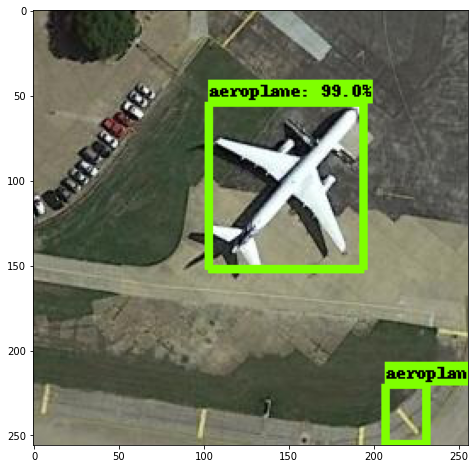

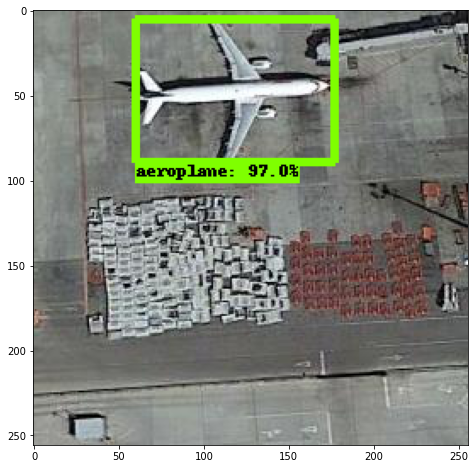

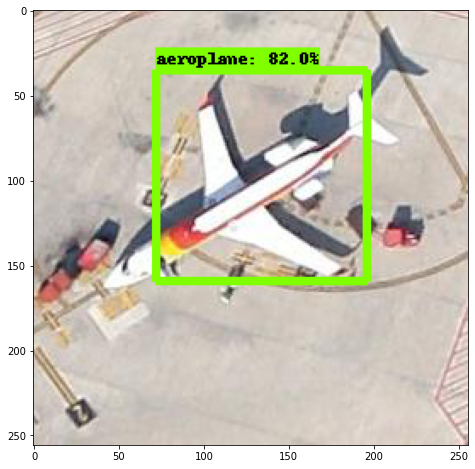

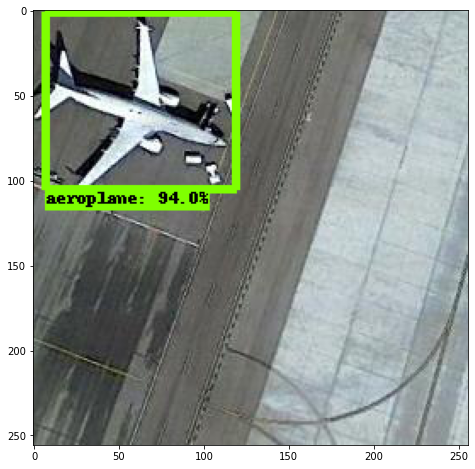

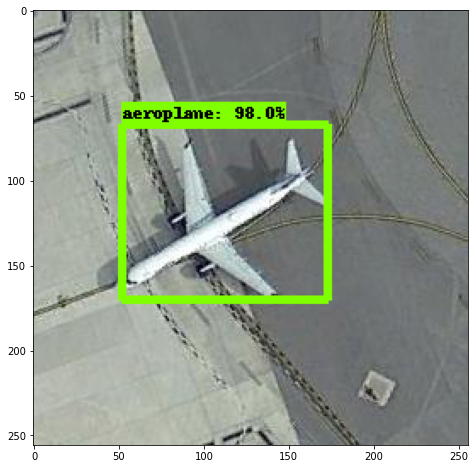

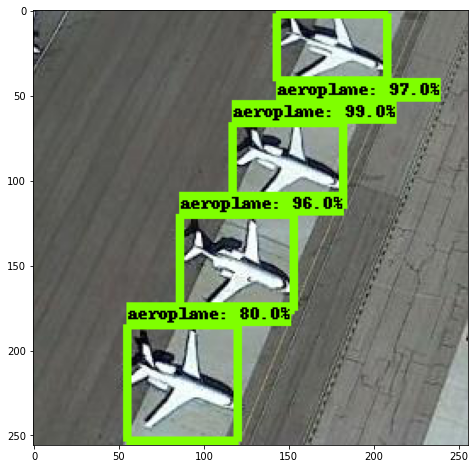

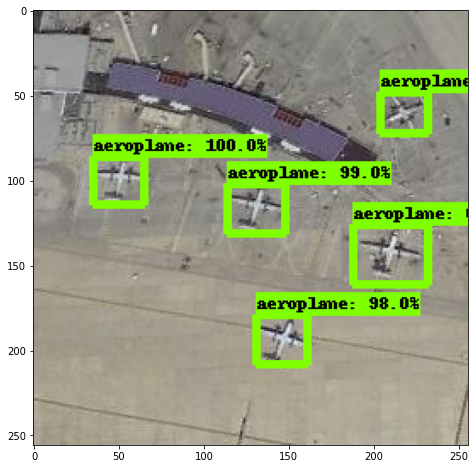

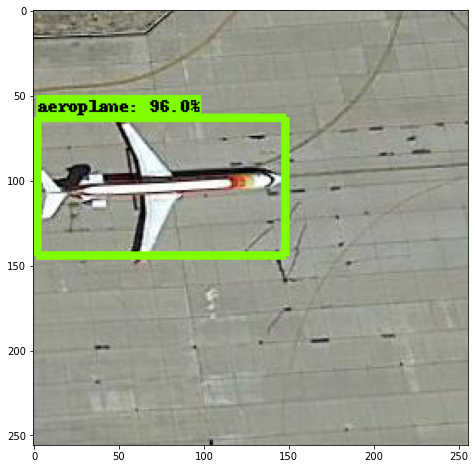

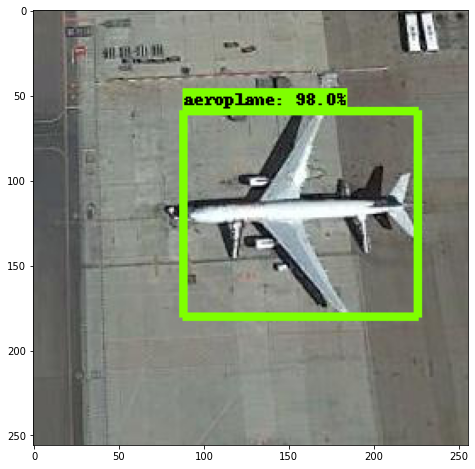

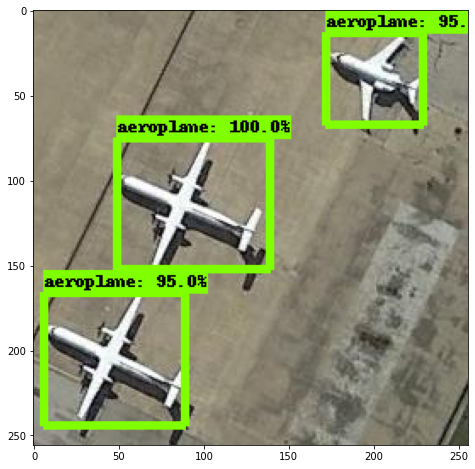

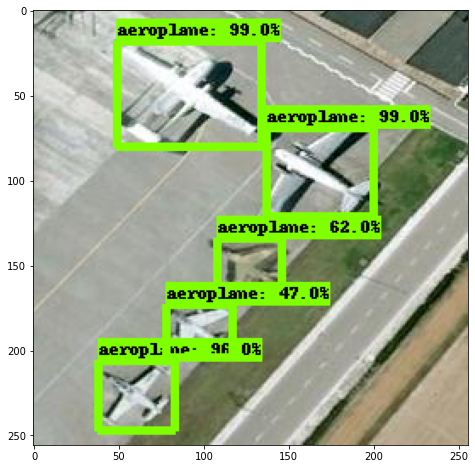

In [112]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    for image_path in TEST_IMAGE_PATHS:      
      image_np=load_image_into_numpy_array(image_path)
      image_np_expanded = np.expand_dims(image_np,axis=0)
      image_tensor=detection_graph.get_tensor_by_name('image_tensor:0')
      boxes=detection_graph.get_tensor_by_name('detection_boxes:0')
      scores=detection_graph.get_tensor_by_name('detection_scores:0')
      classes=detection_graph.get_tensor_by_name('detection_classes:0')
      num_detections = detection_graph.get_tensor_by_name('num_detections:0')
      image_np_with_detections = image_np.copy()
      
      (boxes,scores,classes,num_detections) = sess.run(
          [boxes,scores,classes,num_detections],
          feed_dict={image_tensor:image_np_expanded})
      print(scores)
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          boxes[0],
          classes[0].astype(np.int32),
          scores[0],
          category_index,
          use_normalized_coordinates=True,
          min_score_thresh=.40,
          agnostic_mode=False,
          line_thickness=5)
      
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np_with_detections)
      #print(boxes)
      
